In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import product 
from sklearn.metrics import mean_squared_error

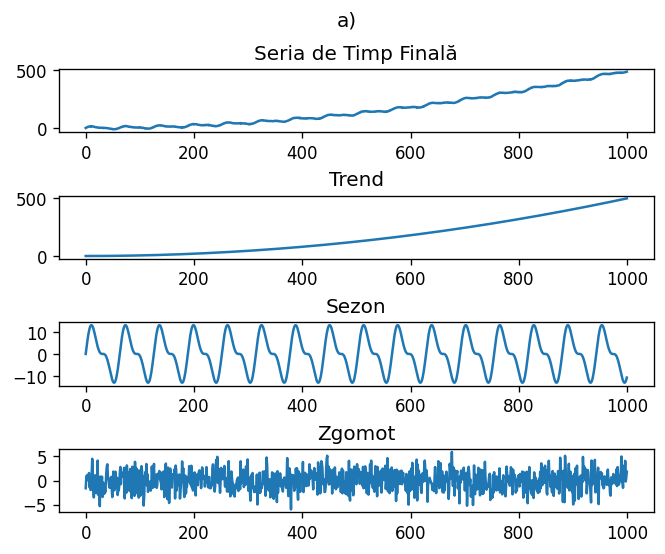

In [7]:
# Pasul 1: Generare trend
def generate_trend(t):
    return 0.5 * t**2 / 1000

# Pasul 2: Generare sezon
def generate_season(t):
    f1, f2 = 0.1, 0.2
    A, B = 10, 5
    return A * np.sin(f1 * t) + B * np.sin(f2 * t)

# Pasul 3: Generare zgomot alb gaussian
def generate_noise(t, sigma=1):
    return np.random.normal(0, sigma, len(t))

# Pasul 4: Generare seria de timp finală
def generate_time_series(t):
    trend = generate_trend(t)
    season = generate_season(t)
    noise = np.random.normal(0, 1, N)
    time_series = trend + season + noise
    return time_series

# Pasul 5: Vizualizare
N = 1000
t = np.arange(N)

time_series = generate_time_series(t)

fig, ax = plt.subplots(4, dpi=120)
fig.suptitle("a)")
ax[0].set_title("Seria de Timp Finală")
ax[0].plot(time_series)
ax[1].set_title("Trend")
ax[1].plot(generate_trend(np.arange(N)))
ax[2].set_title("Sezon")
ax[2].plot(generate_season(np.arange(N)))
ax[3].set_title("Zgomot")
ax[3].plot(generate_noise(np.arange(N), sigma=2))
plt.subplots_adjust(hspace=1)
plt.show()

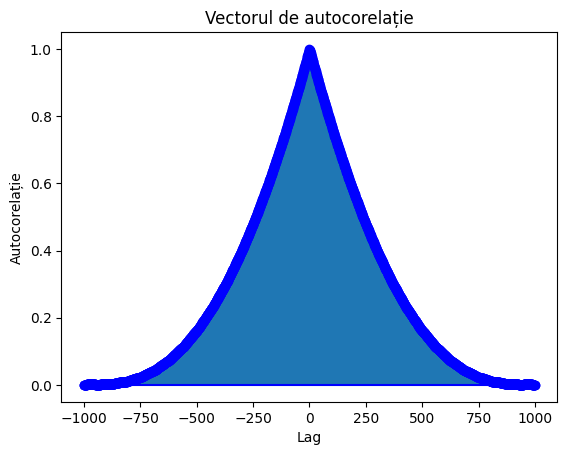

In [8]:
# b) Calcul autocorelație folosind NumPy
autocorrelation = np.correlate(time_series, time_series, mode='full') / np.sum(time_series**2)
lags = np.arange(-len(time_series) + 1, len(time_series))

# Desenare vector autocorelație
plt.stem(lags, autocorrelation, basefmt='b', markerfmt='bo', label='Autocorelație')
plt.xlabel('Lag')
plt.ylabel('Autocorelație')
plt.title('Vectorul de autocorelație')
plt.show()

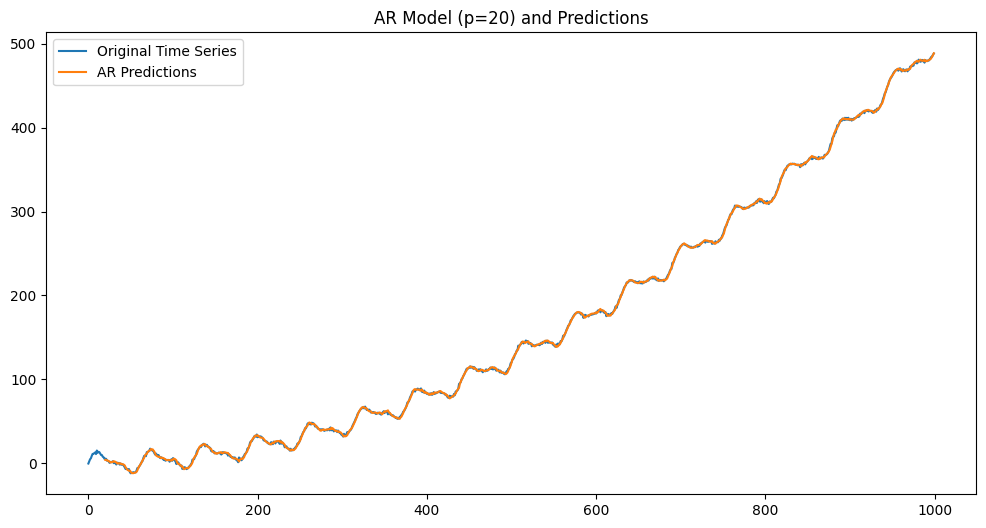

In [9]:
# c) Fit AR model and display predictions
p = 20  # order of the AR model
model = sm.tsa.AutoReg(time_series, lags=p).fit()
predictions = model.predict(start=p, end=N-1)

plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label='Original Time Series')
plt.plot(t[p:], predictions, label='AR Predictions')
plt.legend()
plt.title(f'AR Model (p={p}) and Predictions')
plt.show()

Cea mai bună valoare pentru p este: 26
Cea mai bună valoare pentru m este: 2


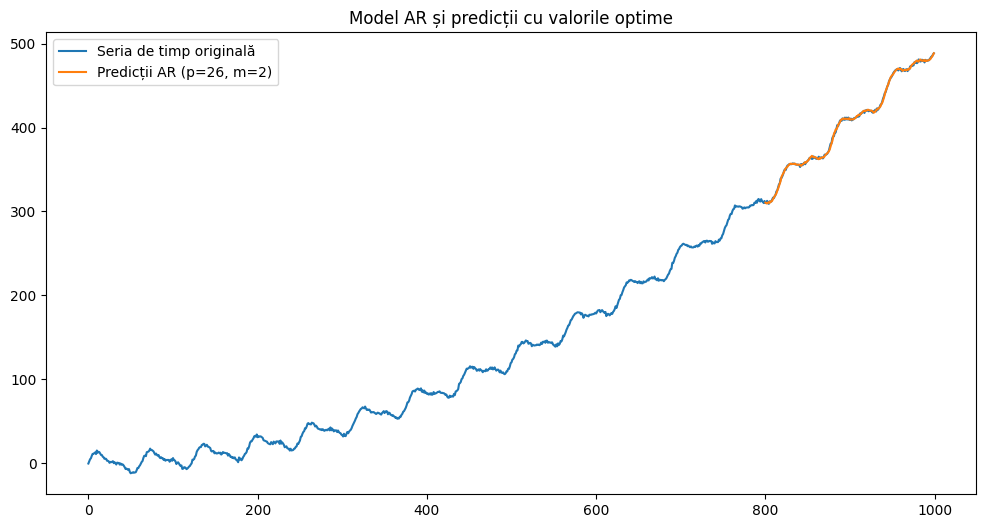

In [10]:
train_size = 800
train_data = time_series[:train_size]
val_data = time_series[train_size:]

# d) Alegere automată a ordinului modelului AR și orizontului de predictie
max_order = 30  # Alegem o valoare maximă pentru ordinul modelului
max_horizon = 20  # Alegem o valoare maximă pentru orizontul de predictie
best_mse = np.inf
best_order = 0
best_horizon = 0

for order, horizon in product(range(1, max_order + 1), range(1, max_horizon + 1)):
    # Antrenare model
    model = sm.tsa.AutoReg(train_data, lags=order).fit()

    # Predictie pe setul de validare
    predictions = model.predict(start=train_size, end=train_size + horizon - 1)

    # Calcul MSE
    mse = mean_squared_error(val_data[:horizon], predictions)

    # Actualizare cel mai bun rezultat
    if mse < best_mse:
        best_mse = mse
        best_order = order
        best_horizon = horizon

print(f"Cea mai bună valoare pentru p este: {best_order}")
print(f"Cea mai bună valoare pentru m este: {best_horizon}")

# Antrenare model AR cu valorile optime
final_model = sm.tsa.AutoReg(time_series, lags=best_order)
final_results = final_model.fit()

# Predictie pe intreaga serie de timp
final_predictions = final_results.predict(start=train_size, end=N-1)

plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label='Seria de timp originală')
plt.plot(t[train_size:], final_predictions, label=f'Predicții AR (p={best_order}, m={best_horizon})')
plt.legend()
plt.title(f'Model AR și predicții cu valorile optime')
plt.show()